In [1]:
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import cv2
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "/kaggle/input/dogs-vs-cats/train.zip"
  
with ZipFile(file_name, 'r') as zip: 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!')

Extracting all the files now...
Done!


In [3]:
dir =  "/kaggle/working/train"
data = []
cats = []
dogs = []
img_list = os.listdir(dir)
for i in range(len(img_list)):
    if(img_list[i][0:3]== "cat"):
        cats.append(img_list[i])
    elif(img_list[i][0:3]== "dog"):
        dogs.append(img_list[i])

In [4]:
for img in cats:
    imgpath = os.path.join(dir, img)
    pet_img = cv2.imread(imgpath, 0)
    resized_img = cv2.resize(pet_img, (50, 50))
    if resized_img.shape != (50, 50):
        print(f"Failed to resize image: {imgpath}")
        continue
    image_normalized = resized_img / 255.0    
    flattened_img = np.array(image_normalized).flatten()
    
    if len(flattened_img) != 2500:
        print(f"Image size mismatch after flattening: {imgpath}")
        continue
    
    data.append([flattened_img, 0])

In [5]:
for img in dogs:
    imgpath = os.path.join(dir,img)
    pet_img = cv2.imread(imgpath,0)
    resized_img = cv2.resize(pet_img, (50, 50))
    if resized_img.shape != (50, 50):
        print(f"Failed to resize image: {imgpath}")
        continue
    image_normalized = resized_img / 255.0    
    flattened_img = np.array(image_normalized).flatten()
    
    if len(flattened_img) != 2500:
        print(f"Image size mismatch after flattening: {imgpath}")
        continue
    
    data.append([flattened_img, 1])

In [6]:
random.shuffle(data)
features = []
labels = []
for i in range (len(data)):
    features.append(data[i][0])
    labels.append(data[i][1])

In [7]:
labels = pd.Series(labels)
features1 = pd.Series(features)
features2 = np.array(features1)

In [8]:
features2 = np.asarray(features2)
labels = np.asarray(labels)

In [9]:
features3 = []
vector = np.vectorize(np.float_)
for i in range(25000):
    features3.append(vector(features2[i]))

In [10]:
x_train,x_test , y_train , y_test = train_test_split(features3 , labels , train_size = 0.6 , random_state=5)

In [11]:
model = SVC(C=2 , gamma = "auto" , kernel = "rbf")

In [12]:
 model.fit(x_train , y_train)

SVC(C=2, gamma='auto')

In [13]:
y_pred = model.predict(x_test)

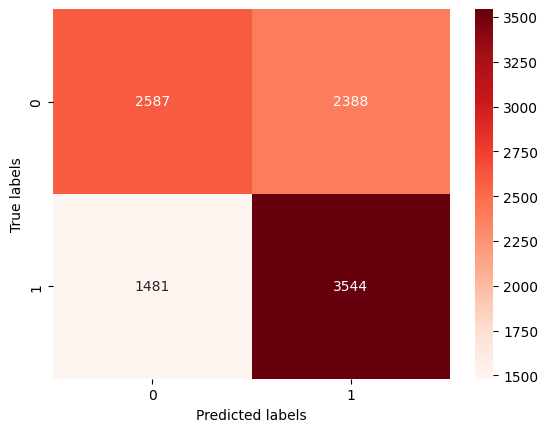

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()